<a href="https://colab.research.google.com/github/Sreelakshmim6/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [172]:
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv",header=None , na_values=[99])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,4.13,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,7.52,9.27,9.27,NaN,9.27,NaN,6.17,7.33,9.08,7.28,NaN,NaN,7.28,7.33,NaN,7.23,NaN,NaN,NaN,9.27,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,NaN,1.55,NaN,NaN,NaN,6.84,6.84,-3.98,6.99,3.45,NaN,6.94,1.55,7.67,NaN,6.55,NaN,NaN,NaN,NaN,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [173]:
len(df)

24983

In [174]:
df[5][345]

1.55

In [175]:

df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
count,24902.000000,16452.000000,18184.000000,16642.000000,15608.000000,24977.000000,20431.000000,24976.000000,24981.000000,15752.000000,20324.000000,21821.000000,22423.000000,24981.000000,22515.000000,24977.000000,24975.000000,24980.000000,24979.000000,24978.000000,24980.000000,24921.000000,21433.000000,20033.000000,15879.000000,20816.000000,23750.000000,24904.000000,23990.000000,24934.000000,17977.000000,24656.000000,24948.000000,16704.000000,21563.000000,24952.000000,24965.00000,16881.000000,22858.000000,23080.000000,22398.000000,18767.000000,24569.000000,17511.000000,16177.000000,21325.000000,23625.000000,22241.000000,24767.000000,24957.000000,24972.000000,18892.000000,20064.000000,24971.000000,24691.000000,19727.000000,24740.000000,15973.000000,15553.000000,18135.000000,17961.000000,24805.000000,24936.000000,20164.000000,17276.000000,24728.000000,24923.000000,17493.000000,24940.000000,24916.000000,20222.000000,8532.000000,8693.000000,8616.000000,8761.000000,8793.000000,8860.000000,8944.000000,9021.000000,9074.000000,9024.000000,9223.000000,9124.000000,9286.000000,9297.000000,9368.000000,9469.000000,9452.000000,9604.000000,9564.000000,9728.000000,9672.000000,9889.000000,9988.000000,10200.000000,10265.000000,10370.000000,10520.000000,10666.000000,10910.000000,9943.000000
mean,72.381174,0.904573,0.208460,0.316574,-1.449114,0.403556,1.594447,-0.429662,-0.624085,-0.557031,1.301231,1.805797,1.449290,-1.762882,1.396334,-1.706201,-3.104818,-1.115141,-0.635103,0.154227,-0.933997,2.095626,0.868662,0.109192,-1.687420,0.382373,1.286232,3.189821,1.518830,2.972455,-0.436493,2.198943,3.155988,-1.368648,0.859494,3.006351,3.31250,-1.363987,1.300479,1.067337,0.998635,-0.320500,1.966875,-0.924856,-2.111891,1.108616,1.500232,1.559535,1.825884,2.771298,3.665085,-0.731653,-0.133121,2.939463,2.735697,0.505731,1.764647,-1.990664,-3.833880,-0.578010,-0.325394,2.459180,2.976021,0.246998,-0.667938,2.273820,2.541538,-0.863868,2.639132,2.559463,0.418405,-0.687494,2.757389,1.082492,-1.553548,-0.270715,2.520047,0.715392,1.751897,0.091667,1.122074,1.836562,0.902718,2.028400,0.694418,0.918927,0.344681,1.900667,2.109940,3.574720,0.612016,2.038527,1.179744,2.504041,1.173482,1.039130,1.528003,1.673750,0.767692,-0.031244,1.354711
std,21.842598,5.171798,5.597327,5.399806,5.234654,5.255700,4.900540,5.495931,4.929144,5.162224,5.087359,4.916611,4.847879,5.076765,5.122385,5.123290,4.956258,4.398482,4.879306,4.887486,5.100931,4.881075,5.099855,5.110971,5.229222,5.044315,4.856339,4.602144,4.977191,4.792813,4.936876,4.916673,4.456629,5.248554,5.034648,4.597890,4.28162,5.200415,5.011207,4.867559,5.043951,5.499445,4.875464,5.261549,5.266100,4.864599,5.062344,4.958268,4.932140,4.587945,4.216015,5.434492,5.189569,4.687193,4.815274,5.218699,4.833610,5.387867,5.010687,4.895153,5.425935,4.718655,4.547434,5.143053,5.152378,5.120954,4.701836,5.216555,4.621860,4.662009,4.771693,5.808941,4.529657,5.224221,5.032757,5.427726,4.724249,5.143225,4.932234,5.307042,5.523134,5.338919,5.054666,5.104706,5.118793,5.290301,5.133460,4.782956,4.703183,4.799183,5.259641,5.060445,5.127291,4.611339,5.140307,5.167043,4.852069,5.025076,5.393833,5.176806,5.300409
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9

In [176]:
df=df.drop(0,axis=1)

In [177]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
count,16452.000000,18184.000000,16642.000000,15608.000000,24977.000000,20431.000000,24976.000000,24981.000000,15752.000000,20324.000000,21821.000000,22423.000000,24981.000000,22515.000000,24977.000000,24975.000000,24980.000000,24979.000000,24978.000000,24980.000000,24921.000000,21433.000000,20033.000000,15879.000000,20816.000000,23750.000000,24904.000000,23990.000000,24934.000000,17977.000000,24656.000000,24948.000000,16704.000000,21563.000000,24952.000000,24965.00000,16881.000000,22858.000000,23080.000000,22398.000000,18767.000000,24569.000000,17511.000000,16177.000000,21325.000000,23625.000000,22241.000000,24767.000000,24957.000000,24972.000000,18892.000000,20064.000000,24971.000000,24691.000000,19727.000000,24740.000000,15973.000000,15553.000000,18135.000000,17961.000000,24805.000000,24936.000000,20164.000000,17276.000000,24728.000000,24923.000000,17493.000000,24940.000000,24916.000000,20222.000000,8532.000000,8693.000000,8616.000000,8761.000000,8793.000000,8860.000000,8944.000000,9021.000000,9074.000000,9024.000000,9223.000000,9124.000000,9286.000000,9297.000000,9368.000000,9469.000000,9452.000000,9604.000000,9564.000000,9728.000000,9672.000000,9889.000000,9988.000000,10200.000000,10265.000000,10370.000000,10520.000000,10666.000000,10910.000000,9943.000000
mean,0.904573,0.208460,0.316574,-1.449114,0.403556,1.594447,-0.429662,-0.624085,-0.557031,1.301231,1.805797,1.449290,-1.762882,1.396334,-1.706201,-3.104818,-1.115141,-0.635103,0.154227,-0.933997,2.095626,0.868662,0.109192,-1.687420,0.382373,1.286232,3.189821,1.518830,2.972455,-0.436493,2.198943,3.155988,-1.368648,0.859494,3.006351,3.31250,-1.363987,1.300479,1.067337,0.998635,-0.320500,1.966875,-0.924856,-2.111891,1.108616,1.500232,1.559535,1.825884,2.771298,3.665085,-0.731653,-0.133121,2.939463,2.735697,0.505731,1.764647,-1.990664,-3.833880,-0.578010,-0.325394,2.459180,2.976021,0.246998,-0.667938,2.273820,2.541538,-0.863868,2.639132,2.559463,0.418405,-0.687494,2.757389,1.082492,-1.553548,-0.270715,2.520047,0.715392,1.751897,0.091667,1.122074,1.836562,0.902718,2.028400,0.694418,0.918927,0.344681,1.900667,2.109940,3.574720,0.612016,2.038527,1.179744,2.504041,1.173482,1.039130,1.528003,1.673750,0.767692,-0.031244,1.354711
std,5.171798,5.597327,5.399806,5.234654,5.255700,4.900540,5.495931,4.929144,5.162224,5.087359,4.916611,4.847879,5.076765,5.122385,5.123290,4.956258,4.398482,4.879306,4.887486,5.100931,4.881075,5.099855,5.110971,5.229222,5.044315,4.856339,4.602144,4.977191,4.792813,4.936876,4.916673,4.456629,5.248554,5.034648,4.597890,4.28162,5.200415,5.011207,4.867559,5.043951,5.499445,4.875464,5.261549,5.266100,4.864599,5.062344,4.958268,4.932140,4.587945,4.216015,5.434492,5.189569,4.687193,4.815274,5.218699,4.833610,5.387867,5.010687,4.895153,5.425935,4.718655,4.547434,5.143053,5.152378,5.120954,4.701836,5.216555,4.621860,4.662009,4.771693,5.808941,4.529657,5.224221,5.032757,5.427726,4.724249,5.143225,4.932234,5.307042,5.523134,5.338919,5.054666,5.104706,5.118793,5.290301,5.133460,4.782956,4.703183,4.799183,5.259641,5.060445,5.127291,4.611339,5.140307,5.167043,4.852069,5.025076,5.393833,5.176806,5.300409
min,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.9500

In [178]:
min(df.mean(axis=0))


-3.8338796373689923

In [179]:
df.iloc[12761][37]

-1.6

In [182]:
dfm=df.mean(axis=0)
dfm.idxmin(),dfm.idxmax()

(58, 50)

In [183]:
arr = df.values
print(arr.shape)

(24983, 100)


In [184]:
rated = np.where(arr!=np.nan)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [185]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!= 99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [186]:
new_arr, idx = replace(arr, 0.1)

In [187]:
new_arr.shape

(24983, 100)

In [188]:
arr[idx[0][0], idx[1][0]]

-3.06

In [189]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [190]:
n_latent_factors = 2

user_ratings = df.values
# Initialise as random values
latent_user_preferences = np.random.random((arr.shape[0], n_latent_factors))
latent_item_features = np.random.random((arr.shape[1], n_latent_factors))

In [191]:
latent_user_preferences

array([[0.53058186, 0.73686861],
       [0.51967508, 0.76209317],
       [0.29620522, 0.53080575],
       ...,
       [0.33316224, 0.57176042],
       [0.63474048, 0.20126905],
       [0.06110852, 0.33201241]])

In [134]:

def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [135]:
num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations


Iteration 0/100:	MSE=26.157279
Iteration 10/100:	MSE=23.084489
Iteration 20/100:	MSE=21.060383
Iteration 30/100:	MSE=18.371997
Iteration 40/100:	MSE=17.355574
Iteration 50/100:	MSE=17.194094
Iteration 60/100:	MSE=17.150218
Iteration 70/100:	MSE=17.136495
Iteration 80/100:	MSE=17.132217
Iteration 90/100:	MSE=17.131104


In [141]:
# to predict just input user id and item id
predict_rating(3781,5)

1.347109615684985

In [137]:
hist

[26.157279477939642,
 23.084488920307297,
 21.060383472851186,
 18.371997001665612,
 17.355573542724425,
 17.194093627132503,
 17.150217773933207,
 17.136495227235113,
 17.132217201755417,
 17.1311042413225]

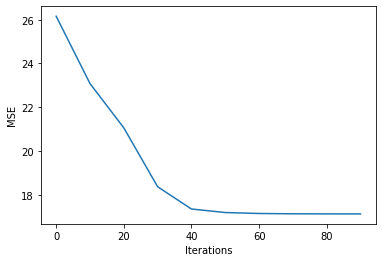

In [138]:
plt.figure()
plt.plot(np.arange(0, num_iter,10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [17]:
df_movie=pd.read_excel('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx')
print(df_movie)

    Movie ID                                                          Title   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7   Factor8   Factor9  Factor10  Factor11  Factor12  Factor13  Factor14  Factor15
0   11        Star Wars: Episode IV - A New Hope (1977)                     -1.521848 -1.038507  2.027269  0.247933 -0.594548  2.513260 -1.848910  0.476710 -0.224146 -0.760681 -0.973915  0.862379  0.403861  1.129616 -0.248806
1   12        Finding Nemo (2003)                                           -0.342185 -0.296586 -0.385962  2.443297 -1.097015 -0.619465  0.572887  0.329516 -0.712228  0.323554 -0.561948 -0.142405 -0.564415  0.506876  1.274993
2   13        Forrest Gump (1994)                                           -2.240888 -0.438815 -2.275177  0.614548  0.904469  0.711919 -0.420876  1.302036 -0.868418 -0.160122  0.633667  0.133138 -0.330276 -2.209004 -0.419092
3   14        American Beauty (1999)                                        -0.634531  2.186059 

In [143]:
df_movie[df_movie["Factor11"] == max(df_movie.iloc[:]['Factor11'])]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
57,671,Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),1.240479,-1.56258,1.684969,1.314667,0.536773,-2.232775,-0.126614,0.510097,0.328387,-2.44802,3.070518,2.40467,0.787788,-0.247284,0.597986


In [142]:
print(round(df_movie[df_movie["Movie ID"] == 671]['Factor5'],3))

57    0.537
Name: Factor5, dtype: float64


In [31]:
print(df_movie[df_movie["Movie ID"] == 2024])

    Movie ID               Title   Factor1   Factor2   Factor3   Factor4   Factor5  Factor6   Factor7   Factor8   Factor9  Factor10  Factor11  Factor12  Factor13  Factor14  Factor15
81  2024      The Patriot (2000)  1.087832 -0.497786 -1.038099 -0.295358  0.975285 -0.08109 -0.282453  0.126386 -0.166706  0.834347 -0.887381  0.498102  0.643096 -0.352181  0.032328


In [21]:
df_user=pd.read_excel('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx',sheet_name='Users')
print(df_user)


    User   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7   Factor8   Factor9  Factor10  Factor11  Factor12  Factor13  Factor14  Factor15
0   4768 -0.204024  0.161079 -0.090447  0.138495 -0.162934  0.163894  0.051502 -0.088582  0.126829  0.065967  0.085008  0.355404  0.007108 -0.118663 -0.039125
1   156  -0.189652 -0.178979 -0.091490 -0.000823 -0.032646  0.177209 -0.098123 -0.068283 -0.011575  0.120866 -0.009931 -0.048606  0.045916  0.113671  0.179873
2   5323 -0.115308 -0.090886 -0.053129  0.018472 -0.068081 -0.004828  0.113005  0.102107  0.034758  0.000693 -0.073712 -0.019460  0.108372  0.054471 -0.109552
3   174  -0.227462 -0.272532 -0.017231  0.054324  0.214755 -0.072639 -0.033122 -0.086508 -0.131479  0.180403  0.095890 -0.082396  0.036767 -0.165438  0.050692
4   4529 -0.014616 -0.102218 -0.107935  0.155784 -0.123362 -0.118228 -0.013549 -0.050622  0.058698 -0.159600 -0.142382 -0.132836 -0.039897  0.129063  0.102669
5   783  -0.020301 -0.031919 -0.036955  0.0336

In [82]:
df_user[df_user["User"] == 3519].values

array([[ 3.51900000e+03, -6.84537298e-02,  2.00900278e-02,
         3.93361657e-02,  2.95773287e-03, -1.81399272e-02,
         6.50140003e-03, -1.08526350e-01,  2.50445593e-02,
         5.63339455e-02, -3.12908227e-02, -3.55325711e-02,
         5.17086636e-03,  5.54640382e-03,  2.07797323e-02,
        -2.36226744e-02]])

In [81]:
a

array([ 3.51900000e+03, -6.84537298e-02,  2.00900278e-02,  3.93361657e-02,
        2.95773287e-03, -1.81399272e-02,  6.50140003e-03, -1.08526350e-01,
        2.50445593e-02,  5.63339455e-02, -3.12908227e-02, -3.55325711e-02,
        5.17086636e-03,  5.54640382e-03,  2.07797323e-02, -2.36226744e-02])

In [29]:
  def predict_rating(user_row, item_row):
    user_values = user_preferences[user_row] 
    item_values = item_factors[item_row] 
    return user_values.dot(item_values)

In [95]:
  def predict_rating2(user_row, item_row):
    a=df_user[df_user["User"] == user_row].values[0]
    b=df_movie[df_movie["Movie ID"] == item_row].values[0] 
    return (b[2:17].dot(a[1:16]))

In [97]:
predict_rating2(3519,2024) #-0.11648209783276431

-0.11648209783276431

In [144]:
predict_rating2(525,629) #0.05914339702507933

0.05914339702507933

In [145]:
predict_rating2(156,187) #-0.26057238682616035

-0.26057238682616035

In [146]:
df_user[df_user["User"] == 768]

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
7,768,0.000819,-0.009229,-0.019228,0.002703,0.012869,0.006655,0.007687,0.018747,0.014705,-0.009256,-0.010116,-0.010051,-0.002108,0.043223,-0.00667


In [166]:
reco=[]
r_mid=[]
for i in df_movie["Movie ID"]:
  p=predict_rating2(4529,i)
  print(p)
  print(i)
  reco.append(p)
  r_mid.append(i)

-0.03817153692267074
11
0.8660518849057814
12
-0.2853161465353527
13
0.016812093912464104
14
-0.24951036609481447
22
-0.7029382109752342
24
0.14435809105371045
38
-0.23324977615893805
63
0.2532788994037278
77
-0.1465753443798021
85
0.1463735866099074
98
-0.21154872369774647
105
-0.5112962864391649
107
0.1492589639044261
114
-0.2156232469953096
120
-0.246139033065045
121
-0.1586746404497891
122
-0.08505837656401027
134
-0.15388411862210008
141
0.23018246107532167
146
0.1711796324156798
153
0.8174992821795523
155
0.0034849785902189706
161
-0.007810211886492099
180
-0.564633094906663
187
0.09538923191925838
194
-0.26683215218039813
197
0.16339702048790794
238
-0.1658749428255072
243
-0.06665299206064496
268
0.7228823662165175
272
-0.11003274086521421
274
0.04711015205193522
275
0.06992803815979601
278
-0.05149887321061045
280
0.5110153236315659
329
-0.6745885670254462
393
-0.46042008238682686
414
-0.017807273068945827
424
0.08940154860570068
453
-0.13342207591637031
462
-0.247488221751158

In [167]:
r_2=pd.DataFrame({'Movie_ID':r_mid ,'Movie_score':reco })
r_2

,Movie_ID,Movie_score
0,11,-0.038172
1,12,0.866052
2,13,-0.285316
3,14,0.016812
4,22,-0.249510
...,...,...
95,9806,0.796196
96,10020,0.578638
97,36657,0.079577
98,36658,0.070540


In [168]:
r_2.sort_values('Movie_score')


,Movie_ID,Movie_score
5,24,-0.702938
36,393,-0.674589
68,854,-0.586712
59,680,-0.578048
24,187,-0.564633
...,...,...
43,558,0.775181
95,9806,0.796196
21,155,0.817499
1,12,0.866052


In [165]:
print(df_movie[df_movie["Movie ID"] == 114])
print(df_movie[df_movie["Movie ID"] == 597])

    Movie ID                Title   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7   Factor8   Factor9  Factor10  Factor11  Factor12  Factor13  Factor14  Factor15
13  114       Pretty Woman (1990)  1.658681  0.325774 -1.436233  0.726912  1.003383 -0.113127 -1.022957  1.283947  0.887846  0.378786  0.061864 -0.52071   0.520683  0.662535 -0.162412
    Movie ID           Title   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7   Factor8   Factor9  Factor10  Factor11  Factor12  Factor13  Factor14  Factor15
47  597       Titanic (1997)  1.567865 -1.516952 -2.523378  1.204485  1.729541 -0.088941  0.102822  1.747792  1.816958 -2.986807 -0.589441 -2.568582  0.370387  2.215933  0.456127


In [169]:
print(df_movie[df_movie["Movie ID"] == 12])
print(df_movie[df_movie["Movie ID"] == 597])

   Movie ID                Title   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7   Factor8   Factor9  Factor10  Factor11  Factor12  Factor13  Factor14  Factor15
1  12        Finding Nemo (2003) -0.342185 -0.296586 -0.385962  2.443297 -1.097015 -0.619465  0.572887  0.329516 -0.712228  0.323554 -0.561948 -0.142405 -0.564415  0.506876  1.274993
    Movie ID           Title   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7   Factor8   Factor9  Factor10  Factor11  Factor12  Factor13  Factor14  Factor15
47  597       Titanic (1997)  1.567865 -1.516952 -2.523378  1.204485  1.729541 -0.088941  0.102822  1.747792  1.816958 -2.986807 -0.589441 -2.568582  0.370387  2.215933  0.456127


In [32]:
latent_factors=2
arr_movie = df_movie.values
arr_user = df_user.values
# print(arr_movie[np.where(arr_movie[:,0] == 141)])

# Initialise as random values
user_preferences = np.random.random((arr_user.shape[0], latent_factors))
item_factors = np.random.random((arr_movie.shape[1], latent_factors))

In [ ]:
len(arr_movie)

100

In [ ]:
item_factors


array([[5.45931955e-01, 8.69206377e-01],
       [5.35852504e-01, 9.94069777e-01],
       [9.84085359e-01, 8.82856621e-01],
       [7.95837837e-01, 8.75075136e-01],
       [7.16615383e-02, 7.62046261e-03],
       [9.85926787e-01, 9.08968435e-05],
       [3.61687549e-01, 2.20280959e-01],
       [8.18129666e-01, 2.97936487e-01],
       [6.17161491e-01, 1.55677513e-01],
       [4.65884350e-01, 5.34029150e-01],
       [3.22610004e-02, 7.37402156e-01],
       [4.33292030e-01, 5.97057755e-01],
       [5.37675374e-01, 5.18163044e-01],
       [3.34041346e-01, 5.26214724e-01],
       [6.05046901e-01, 7.82613016e-01],
       [1.86987399e-01, 4.52080354e-01]])

In [34]:
df_movie[df_movie["Movie ID"] == 141]

,Movie ID,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
18,141,0.056865,1.573001,0.631437,-0.019755,0.390186,-0.075435,-0.443608,-0.987379,0.135949,-0.156905,0.442035,-0.284181,0.698186,0.260986,0.472673
